In [43]:
import pandas as pd
import numpy as np
#import keras
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(2)

In [23]:
data = pd.read_csv('creditcard.csv')

## Data exploration

In [24]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,51435.0,1.197490,-0.352125,-0.135904,0.222100,0.231128,1.086617,-0.420363,0.391464,0.672499,...,-0.337999,-0.963921,-0.121931,-1.723430,0.368319,0.408003,-0.031160,-0.013680,39.95,0
1,78049.0,0.976047,-0.289947,1.465321,1.300002,-1.382887,-0.479586,-0.632572,0.064533,0.710743,...,0.322829,0.790185,-0.101364,0.730461,0.286601,-0.283233,0.059639,0.061220,92.98,0
2,157168.0,-1.395302,0.478266,-0.584911,-1.201527,0.928544,-0.743618,0.755504,-0.141397,-2.118499,...,0.282803,0.903183,-0.444694,0.696438,1.153480,0.311671,-0.662353,-0.161005,29.57,0
3,69297.0,1.276014,-0.672705,-0.425494,-0.777398,-0.582088,-0.880396,-0.103505,-0.203036,-1.241653,...,0.256003,0.408211,-0.274815,0.028707,0.743485,-0.087089,-0.054869,-0.000007,92.68,0
4,144504.0,-0.312745,-1.202565,2.249806,-0.297210,-0.963389,1.207532,-0.837776,-0.057654,1.121421,...,-0.274386,0.682305,0.432717,0.722364,-1.394148,0.660007,-0.221374,-0.136090,40.00,0


## Pre-processing

In [25]:
from sklearn.preprocessing import StandardScaler
data['normalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Amount'],axis=1)

In [26]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,51435.0,1.197490,-0.352125,-0.135904,0.222100,0.231128,1.086617,-0.420363,0.391464,0.672499,...,-0.337999,-0.963921,-0.121931,-1.723430,0.368319,0.408003,-0.031160,-0.013680,0,-0.190454
1,78049.0,0.976047,-0.289947,1.465321,1.300002,-1.382887,-0.479586,-0.632572,0.064533,0.710743,...,0.322829,0.790185,-0.101364,0.730461,0.286601,-0.283233,0.059639,0.061220,0,0.017516
2,157168.0,-1.395302,0.478266,-0.584911,-1.201527,0.928544,-0.743618,0.755504,-0.141397,-2.118499,...,0.282803,0.903183,-0.444694,0.696438,1.153480,0.311671,-0.662353,-0.161005,0,-0.231161
3,69297.0,1.276014,-0.672705,-0.425494,-0.777398,-0.582088,-0.880396,-0.103505,-0.203036,-1.241653,...,0.256003,0.408211,-0.274815,0.028707,0.743485,-0.087089,-0.054869,-0.000007,0,0.016340
4,144504.0,-0.312745,-1.202565,2.249806,-0.297210,-0.963389,1.207532,-0.837776,-0.057654,1.121421,...,-0.274386,0.682305,0.432717,0.722364,-1.394148,0.660007,-0.221374,-0.136090,0,-0.190258


In [27]:
data = data.drop(['Time'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,1.197490,-0.352125,-0.135904,0.222100,0.231128,1.086617,-0.420363,0.391464,0.672499,-0.058119,...,-0.337999,-0.963921,-0.121931,-1.723430,0.368319,0.408003,-0.031160,-0.013680,0,-0.190454
1,0.976047,-0.289947,1.465321,1.300002,-1.382887,-0.479586,-0.632572,0.064533,0.710743,-0.093670,...,0.322829,0.790185,-0.101364,0.730461,0.286601,-0.283233,0.059639,0.061220,0,0.017516
2,-1.395302,0.478266,-0.584911,-1.201527,0.928544,-0.743618,0.755504,-0.141397,-2.118499,0.182768,...,0.282803,0.903183,-0.444694,0.696438,1.153480,0.311671,-0.662353,-0.161005,0,-0.231161
3,1.276014,-0.672705,-0.425494,-0.777398,-0.582088,-0.880396,-0.103505,-0.203036,-1.241653,0.849479,...,0.256003,0.408211,-0.274815,0.028707,0.743485,-0.087089,-0.054869,-0.000007,0,0.016340
4,-0.312745,-1.202565,2.249806,-0.297210,-0.963389,1.207532,-0.837776,-0.057654,1.121421,0.744263,...,-0.274386,0.682305,0.432717,0.722364,-1.394148,0.660007,-0.221374,-0.136090,0,-0.190258


In [28]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']


In [29]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [31]:
X_train.shape

(130200, 29)

In [32]:
X_test.shape

(55800, 29)

## Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
random_forest = RandomForestClassifier(n_estimators=100)

In [35]:
random_forest.fit(X_train,y_train.values.ravel())

RandomForestClassifier()

In [36]:
y_pred = random_forest.predict(X_test)

In [37]:
random_forest.score(X_test,y_test)

0.9994802867383512

In [38]:
cnf_matrix = confusion_matrix(y_test,y_pred)

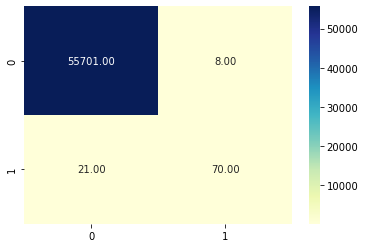

In [39]:
labels = [0,1]
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt=".2f", xticklabels=labels, yticklabels=labels)
plt.show()

In [40]:
y_pred = random_forest.predict(X)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
cnf_matrix = confusion_matrix(y,y_pred.round())

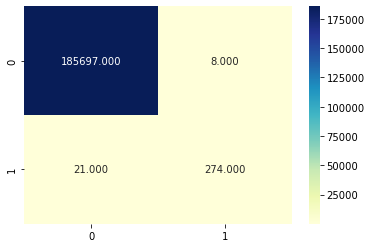

In [42]:
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.show()